## Import Libraries

In [77]:
import os
import requests
from selenium import webdriver 
import re
from time import sleep
import pandas as pd
from parsel import Selector
from matplotlib import pyplot as plt
import csv

%matplotlib inline

## Automate Google Search Query

In [9]:
driver = webdriver.Firefox()
driver.get('https://www.google.com')
search_query = driver.find_element_by_name('q')
search_india_aspnet = 'site:linkedin.com/in/ AND "#jobchange" AND "India" AND "ASP.NET"'
search_india_mobile = 'site:linkedin.com/in/ AND "#jobchange" AND "India" AND "ANDROID" AND "iOS" AND "HYBRID"'
search_query.send_keys(search_india_mobile)
button = driver.find_element_by_xpath('/html/body/div/div[4]/form/div[2]/div[1]/div[3]/center/input[1]')
button.click()

## Automate LinkedIn Login

In [10]:
linkedin_urls = driver.find_elements_by_class_name('iUh30')
linkedin_urls = [url.text for url in linkedin_urls]

linkedin_urls = ['https://in.linkedin.com/in/rajeshmaheshwari007', 'https://in.linkedin.com/in/hr-satva-solutions-it-company-a75558137', 'https://in.linkedin.com/in/keyur-patel-966367169', 'https://in.linkedin.com/in/chetanpandey29', 'https://in.linkedin.com/in/ankitkumarpandya', 'https://in.linkedin.com/in/raveena-rathi-099588107', 'https://in.linkedin.com/in/ankit-tiwari-46873837']
driver.get('https://www.linkedin.com/login')

email = 'om.prakash18@yandex.com'
search_email_input=driver.find_element_by_id('username')
search_email_input.send_keys(email)

password = 'Qwerty@123'
search_password_input=driver.find_element_by_id('password')
search_password_input.send_keys(password)

login_button = driver.find_element_by_xpath("//button[@class='btn__primary--large from__button--floating']")
login_button.click()

## Get Data

In [11]:
myFile = open('dataFile.csv', 'w')
myFields = ['Name', 'Presently Working', 'LinkedIn Profile']
writer = csv.DictWriter(myFile, fieldnames=myFields)
writer.writeheader() 

for temp in linkedin_urls:
    driver.get(temp)
    sel = Selector(text=driver.page_source)
    
    name = sel.xpath('/html/body/div[6]/div[4]/div[3]/div/div/div/div/div[2]/div[1]/div[1]/div/section/div[2]/div[2]/div[1]/ul[1]/li[1]').extract_first()
    nameValue=''
    technologyValue=''
    if name:
        s = name.strip()
        a = []
        a = s.split()
        nameValue=a[6]+" "+a[7]
        print(nameValue)
        
    
    technology = sel.xpath('/html/body/div[6]/div[4]/div[3]/div/div/div/div/div[2]/div[1]/div[1]/div/section/div[2]/div[2]/div[1]/h2').extract_first() 
    #print(technology.strip())
    if technology:
        s=technology.strip()
        a = []
        a = s.split()
        technologyValue=a[5]+" "+a[6]+" "+a[7]+" "+a[8]
        print(technologyValue)
        

    writer.writerow({'Name' : nameValue, 'Presently Working' : technologyValue, 'LinkedIn Profile' : temp})


Rajesh Maheshwari
Asp.net, Node.js, Angular.js, React.js
HR Satva
Urgently Hiring Sr Asp.Net
keyur patel
Software Developer at EVEREST
Chetan Pandey
CEO at The Bridge
Ankit Pandya
RPA Developer at Mphasis
Raveena Rathi
Corporate Recruiter at Rigel
Ankit Tiwari
Sr. Android Developer at


## Other Parameters to Scrap data

In [ ]:
    '''# xpath to extract the text from the class containing the job title
    job_title = sel.xpath('//*[starts-with(@class, "pv-top-card-section__headline")]/text()').extract_first()

    if job_title:
        job_title = job_title.strip()


    # xpath to extract the text from the class containing the company
    company = sel.xpath('//*[starts-with(@class, "pv-top-card-v2-section__entity-name pv-top-card-v2-section__company-name")]/text()').extract_first()

    if company:
        company = company.strip()


    # xpath to extract the text from the class containing the college
    college = sel.xpath('//*[starts-with(@class, "pv-top-card-v2-section__entity-name pv-top-card-v2-section__school-name")]/text()').extract_first()

    if college:
        college = college.strip()'''
    
    
    '''print('job_title' + job_title)
    print('company' + company)
    print('college' + college)'''

## Get Data into DataFrame

In [32]:
df = pd.read_csv('dataFile_technology.csv')
df.rename(columns={'Presently Working': 'Technology'}, inplace=True)
df.dropna(axis = 0, how = 'all', inplace = True)
df.head(10)

Name                              Technology  \
1   Rajesh Maheshwari  Asp.net, Node.js, Angular.js, React.js   
3            HR Satva            Asp.Net, Angular, React, PHP   
5         keyur patel              Asp.Net, Java, CodeIgnitor   
7       Chetan Pandey                            python, .Net   
9                 NaN                                     NaN   
11      Raveena Rathi                         C, Python, .Net   
13       Ankit Tiwari                        C++, C#, ASP.Net   

                                     LinkedIn Profile  
1      https://in.linkedin.com/in/rajeshmaheshwari007  
3   https://in.linkedin.com/in/hr-satva-solutions-...  
5    https://in.linkedin.com/in/keyur-patel-966367169  
7           https://in.linkedin.com/in/chetanpandey29  
9         https://in.linkedin.com/in/ankitkumarpandya  
11  https://in.linkedin.com/in/raveena-rathi-09958...  
13   https://in.linkedin.com/in/ankit-tiwari-46873837

## Calculate Total Count for Some Technology

In [52]:
df_technology = df['Technology'].str.lower()
df_angular = df_technology.str.contains("angular") 
df_python = df_technology.str.contains("python") 
df_net = df_technology.str.contains('net')
df_react = df_technology.str.contains('react')

In [81]:
df_tech = {"Angular": df_angular.sum(), "Python": df_python.sum(), "Asp.Net": df_net.sum(), "React": df_react.sum()}
tech_count = pd.DataFrame(list(df_tech.items()), columns=['Technology', 'Count'])
tech_count

Technology  Count
0    Angular      2
1     Python      2
2    Asp.Net      6
3      React      2

## Technology Distribution

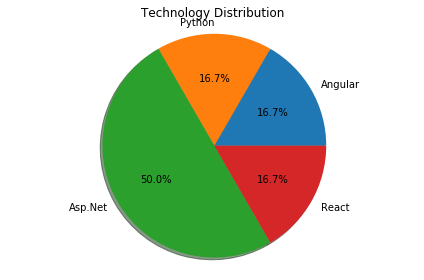

In [87]:
plt.pie(tech_count['Count'], labels=tech_count['Technology'], shadow=True,autopct='%1.1f%%')
plt.title("Technology Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()    